In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def normalize_feature(feature, max_samples, value_repeat=None):
    last_feature = len(feature) - 1
    while last_feature < max_samples:
        if value_repeat == None:
            repeated_feature = feature[last_feature]
        else:
            repeated_feature = value_repeat
        feature.append(repeated_feature)
        last_feature += 1

def normalize_samples(scores, max_samples):
    normalized_scores = scores.copy()
    for precisions, recalls in normalized_scores:
        normalize_feature(precisions, max_samples)
        normalize_feature(recalls, max_samples, 1.0)
    return normalized_scores

def average_score(scores):
    precisions = map(lambda score: np.array(score[0]), scores)
    recalls = map(lambda score: np.array(score[1]), scores)
    
    average_precision = sum(precisions) / len(scores)
    average_recall = sum(recalls) / len(scores)
    return average_precision, average_recall

        

def plot_recall_precision(recall, precision, label=None, focus=False):
    plt.plot(recall, precision, label=label)
    if focus:
        line_focus_x = [0, recall[len(recall)-1]+1]
        line_focus_y = [precision[len(recall)-1], precision[len(recall)-1]]
        plt.plot(line_focus_x, line_focus_y, "k--")
    plt.axis([0.03, 1.05, 0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    ticks = [ i/20 for i in range(21)]
    plt.yticks(ticks)
    
def plot_f1_measure(recall, precision, label=None):
    f_measure = 2 * recall * precision / (recall + precision)
    plt.plot(recall, f_measure, label=label)
    plt.axis([0.03, 1.05, 0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("F1 Measure")
    ticks = [ i/20 for i in range(21)]
    plt.yticks(ticks)

In [3]:
import jaccard_similiarity
target = "dataset-target"
noise = "dataset-noise"
site_a = "NBA_pages"
site_b = "REALGM_pages"

sites = [
    ("NBA_pages", "REALGM_pages"),
    ("REALGM_pages", "ROTOWORLD_pages"),
    ("ROTOWORLD_pages", "NBA_pages")
]

def get_scores(site_a, site_b, iteration_step):
    scores = []
    page_to_link = 5
    total_pages = 75
    while ( page_to_link <= total_pages ):
        print("starting", site_a, site_b)
        scores.append(jaccard_similiarity.entity_linkage(target, noise, site_a, site_b, page_to_link))
        page_to_link += iteration_step
    return scores

In [ ]:
total_scores = []
for site_a, site_b in sites:
    actual_score = get_scores(site_a, site_b, 5)
    score_info = (site_a + " vs " + site_b, actual_score)
    total_scores.append(score_info)
    
print("Everything Done!")

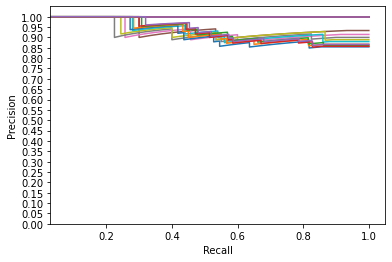

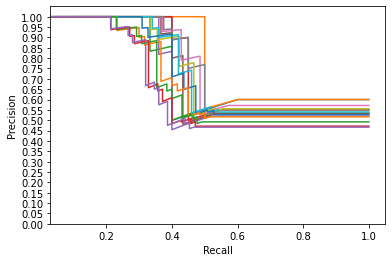

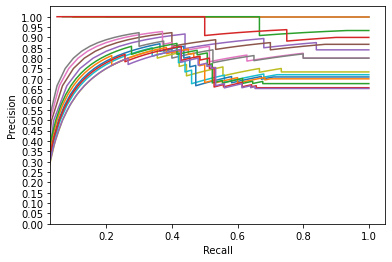

In [90]:
for title, scores in total_scores:
    for precision, recall in normalize_samples(scores, page_to_link):
        plot_recall_precision(recall, precision)
    plt.show()

#### I grafici sono la media dei valori dei grafici di sopra al variare dell'input

La grandezza dell'input è sempre costante ed è impostata a quella massima

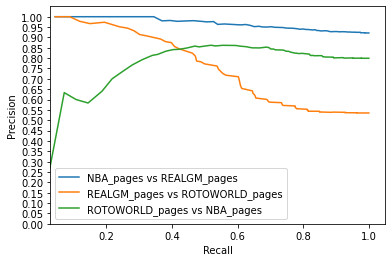

In [86]:
for title, scores in total_scores:
    average_precision, average_recall = average_score(normalize_samples(scores, page_to_link))
    plot_recall_precision(average_recall, average_precision, title)

plt.legend()

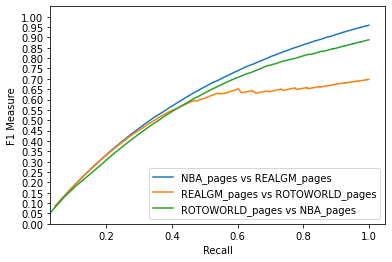

In [87]:
for title, scores in total_scores:
    average_precision, average_recall = average_score(normalize_samples(scores, page_to_link))
    plot_f1_measure(average_recall, average_precision, title)
    
plt.legend()

# In base alla grandezza dell'input avrò valori differenti

A differenza di prima qui non si fa una media nella dimensione dell'input.

Invece si prendono i valori migliori in base alla grandezza dell'input

In [29]:
epsilon = 1e-3

def get_measures(site_a, site_b):
    input_size = 2
    f1_measures = []
    precisions = []
    recalls = []
    inputs = []

    for input_size in range(5, 75 + 1, 5):
        precision, recall = jaccard_similiarity.entity_linkage(target, noise, site_a, site_b, input_size)
        precision = np.array(precision)
        recall = np.array(recall)
        f1_measure = 2 * precision * recall / (precision + recall + epsilon)
        best_f1_measure_index = np.argmax(f1_measure)
        best_precision = precision[best_f1_measure_index]
        best_recall = recall[best_f1_measure_index]
        best_f1 = f1_measure[best_f1_measure_index]
        f1_measures.append(best_f1)
        precisions.append(best_precision)
        recalls.append(best_recall)
        inputs.append(input_size)
        
    print(f1_measures)
    return inputs, precisions, recalls, f1_measures
    

In [30]:
total_inputs = []
total_precisions = []
total_recalls = []
total_f1_measures = []

for site_a, site_b in sites:
    inputs, precisions, recalls, f1_measures = get_measures(site_a, site_b)
    total_inputs.append(inputs)
    total_precisions.append(precisions)
    total_recalls.append(recalls)
    total_f1_measures.append(f1_measures)

Number of pages:  5
Number of pages:  10
Number of pages:  15
Number of pages:  20
Number of pages:  25
Number of pages:  30
Number of pages:  35
Number of pages:  40
Number of pages:  45
Number of pages:  50
Number of pages:  55
Number of pages:  60
Number of pages:  65
Number of pages:  70
Number of pages:  75
[0.9995002498750625, 0.9995002498750625, 0.9995002498750625, 0.9995002498750625, 0.9995002498750625, 0.9328336010470583, 0.9137859875737598, 0.8995002776235426, 0.8960525966968003, 0.886098697688907, 0.8540457469275714, 0.8661669549618811, 0.8677173720559589, 0.8566431486394841, 0.8661669549618811]
Number of pages:  5
Number of pages:  10
Number of pages:  15
Number of pages:  20
Number of pages:  25
Number of pages:  30
Number of pages:  35
Number of pages:  40
Number of pages:  45
Number of pages:  50
Number of pages:  55
Number of pages:  60
Number of pages:  65
Number of pages:  70
Number of pages:  75
[0.5995004163197336, 0.6662225183211193, 0.5450210060179403, 0.599555884

In [31]:
'''
inputs = list(map(lambda x: x[3], total_f1_measures))
f1_values = list(map(lambda x: x[2], total_f1_measures))
'''

'\ninputs = list(map(lambda x: x[3], total_f1_measures))\nf1_values = list(map(lambda x: x[2], total_f1_measures))\n'

In [32]:
def plot_feature_on_input_size(feature, input_size, feature_name):
    plt.plot(input_size, feature)
    plt.xlabel("Input size")
    plt.ylabel(feature_name)
    plt.axis([input_size[0], input_size[-1], 0, 1.05])

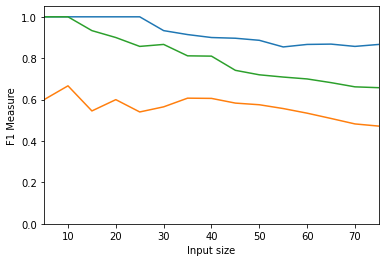

In [33]:
for f1_measures in total_f1_measures:
    plot_feature_on_input_size(f1_measures, inputs, "F1 Measure")

In [ ]:
f1_measures